In [1]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on June 15 2018

@author: ncaplar@princeton.edu

"""
%connect_info

# Next cell contains some extensions that I use that make life much easier when using jupyter notebook 
# Without them this notebook becomes really huge and hard to deal with
# These can be downloaded from https://github.com/ipython-contrib/jupyter_contrib_nbextensions

{
  "stdin_port": 64583, 
  "ip": "127.0.0.1", 
  "control_port": 64584, 
  "hb_port": 64585, 
  "signature_scheme": "hmac-sha256", 
  "key": "412f619e-3900da6c8eb69c18bc41cc95", 
  "kernel_name": "", 
  "shell_port": 64581, 
  "transport": "tcp", 
  "iopub_port": 64582
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-e7f5aeeb-a43d-46f9-9ec2-9974a1c8b294.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [2]:
%%javascript
try {
  require(['base/js/utils'], function (utils) {
    utils.load_extension('code_prettify/code_prettify');
    utils.load_extension('collapsible_headings/main'); 
    utils.load_extension('codefolding/edit'); 
    utils.load_extension('codefolding/main'); 
    utils.load_extension('execute_time/ExecuteTime');   
    utils.load_extension('toc2/main'); 
  });
}
catch (err) {
  console.log('toc2 load error:', err);
}


<IPython.core.display.Javascript object>

In [3]:
# make notebook nice and wide to fill the entire screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [19]:
#import statments

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.rc = {}
%matplotlib inline

from IPython.display import Image

# Motivation

In [14]:
# ==============================================================================================
# Main motivation is to model skylines, with special empahsis on modelling extended wings arond very bright skylines in order to extract faint signal.
# ==============================================================================================

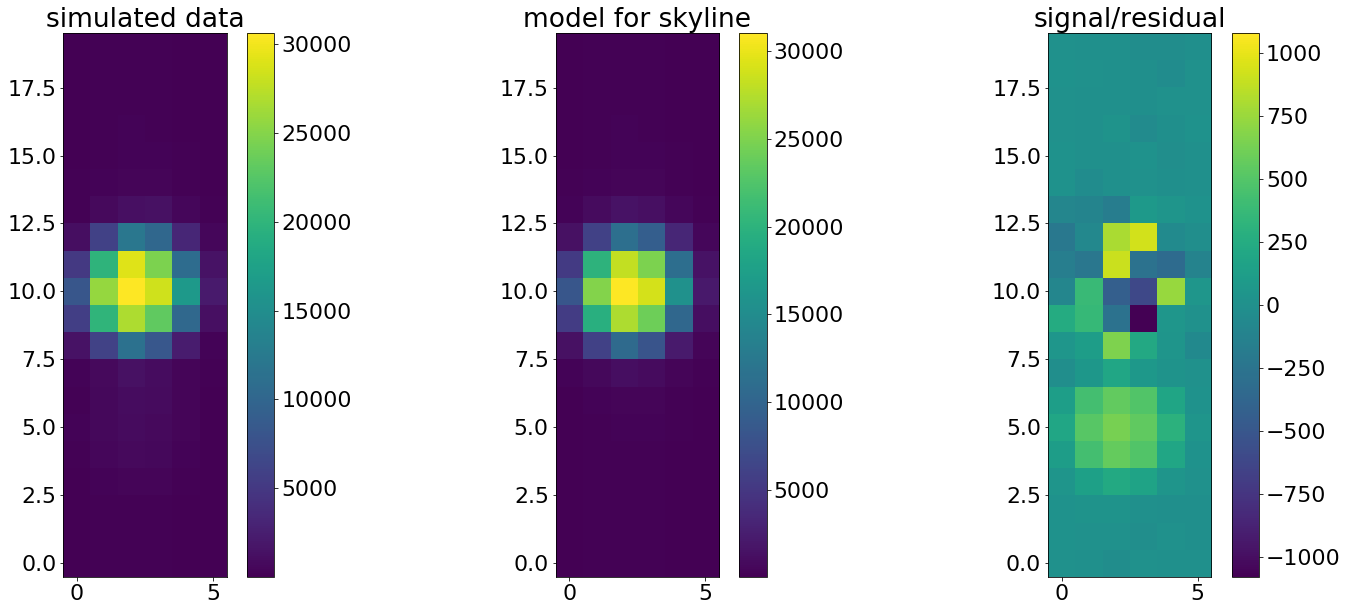

In [15]:
# ==============================================================================================
# Left: Some simulated data, skyline at y=10 pixels and "data" which can not be seen at 5 pixels
# Center: Model for the simulated data
# Right: Subtraction, we can see simulated data now 
# ==============================================================================================

Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/Extraction2D.png")

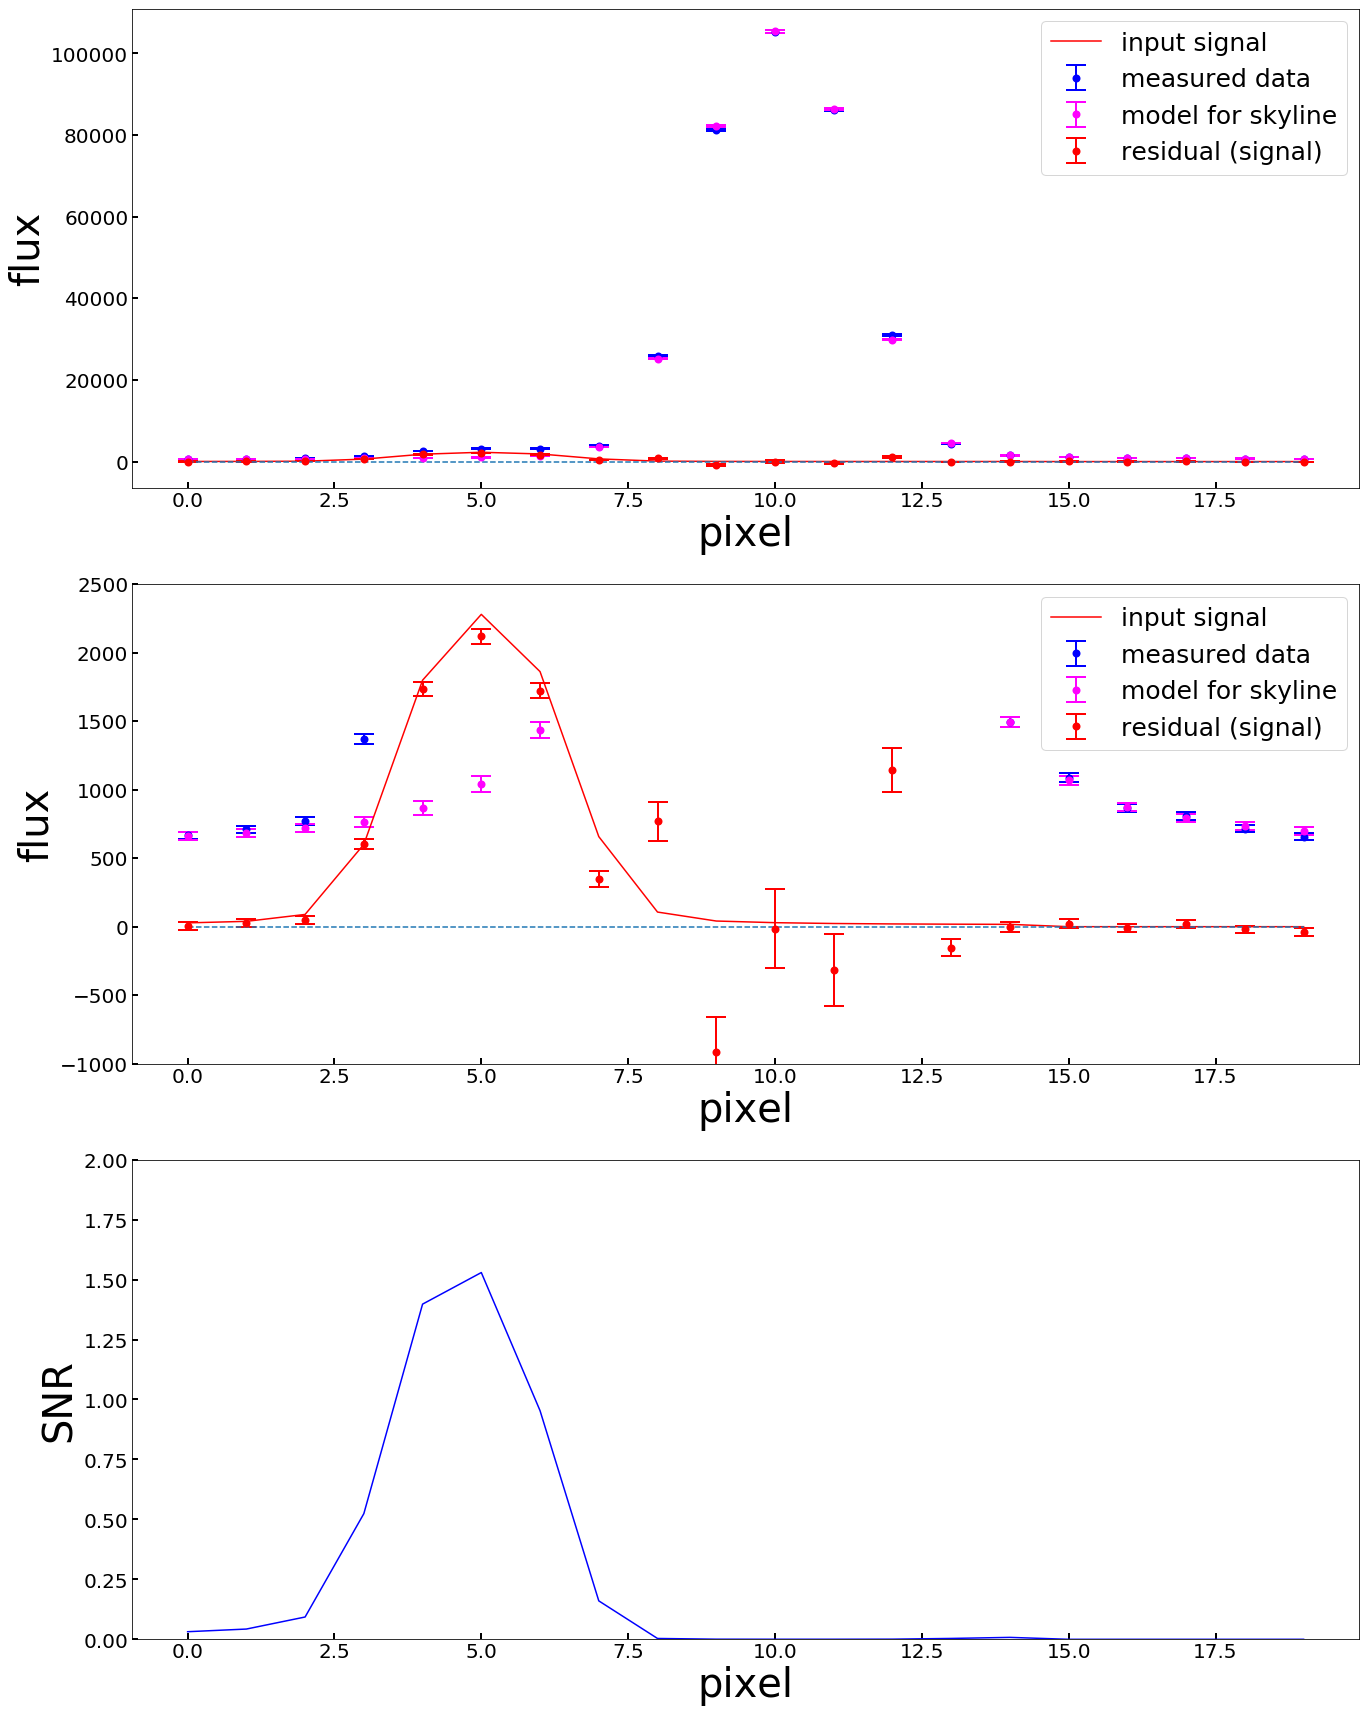

In [16]:
# ==============================================================================================
# Top: recovered signal
# Center: zoom in of the recovered signal
# Bottom: Signal to noise ratio
# ==============================================================================================

Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/Extraction.png")

# Small overview of the procedure

## intro

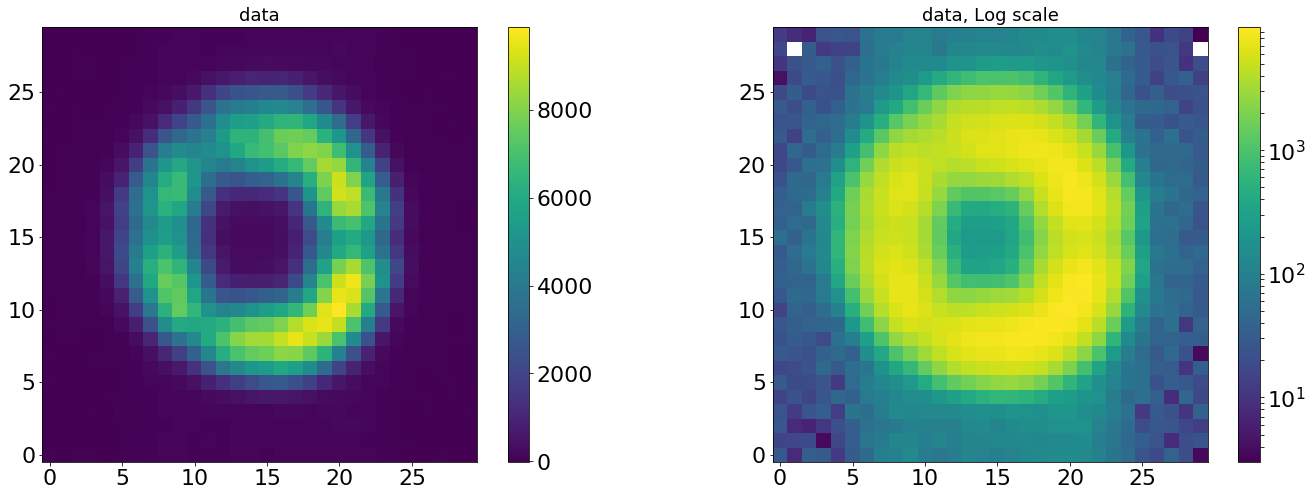

In [20]:
# ==============================================================================================
# Example of the defocused data
# ==============================================================================================

DATA_FOLDER='/Users/nevencaplar/Documents/PFS/TigerAnalysis/CutsForTigerMay2/'

obs='8564'
single_number='55'

sci_image =np.load(DATA_FOLDER+'sci'+str(obs)+str(single_number)+'Stacked.npy')
var_image =np.load(DATA_FOLDER+'var'+str(obs)+str(single_number)+'Stacked.npy')

plt.figure(figsize=(24,8))
plt.subplot(121)
plt.imshow(sci_image,origin='lower')
plt.colorbar()
plt.title('data', fontsize=18)

plt.subplot(122)
plt.imshow(sci_image,origin='lower',norm=LogNorm())
plt.colorbar()
plt.title('data, Log scale', fontsize=18)

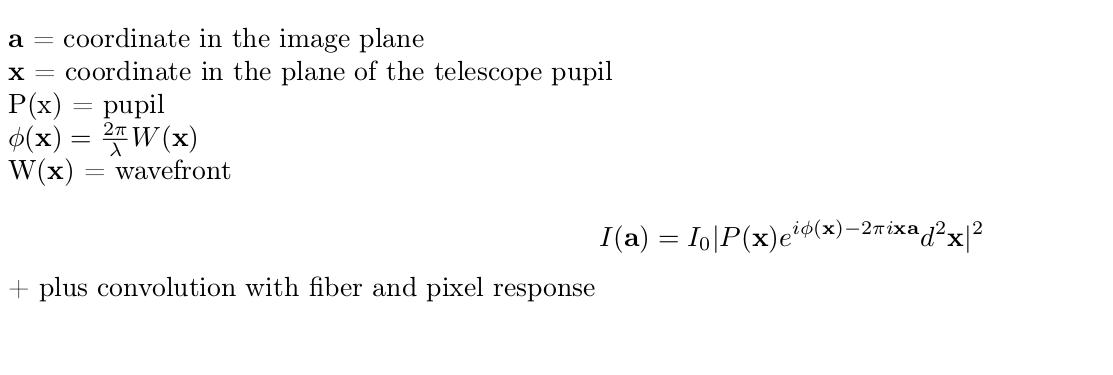

In [21]:
Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/equation.png")

## ilumination and wavefront of the exit pupil

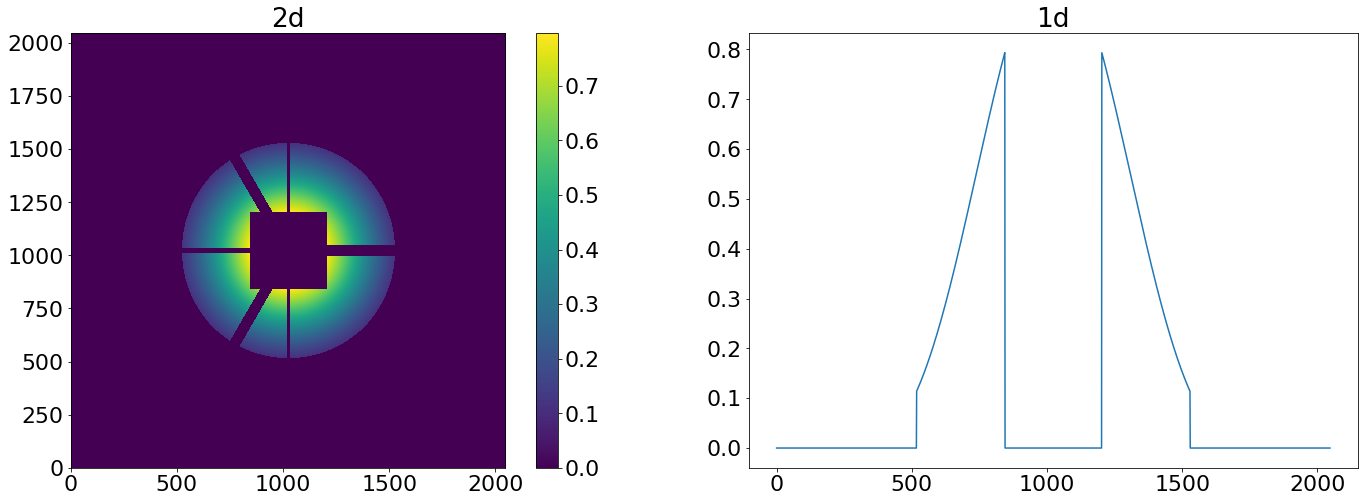

In [22]:
# ==============================================================================================
# this example is not exact fit to the data shown above!
# first we show ilumination of the exit pupil
# possibility for non-uniform illumination
#   i) because of the geometric effects in the telescope
#   ii) nonuniform illumination of the enterence pupil
# ==============================================================================================

r=np.load('/Users/nevencaplar/Documents/PFS/Testing/MondayMeeting/r.npy') 

plt.figure(figsize=(24,8))
plt.subplot(121)
plt.imshow(r,origin='lower')
plt.colorbar()
plt.title('2d')

plt.subplot(122)
plt.plot(r[:,int(r.shape[0]/2+25)])
plt.title('1d')

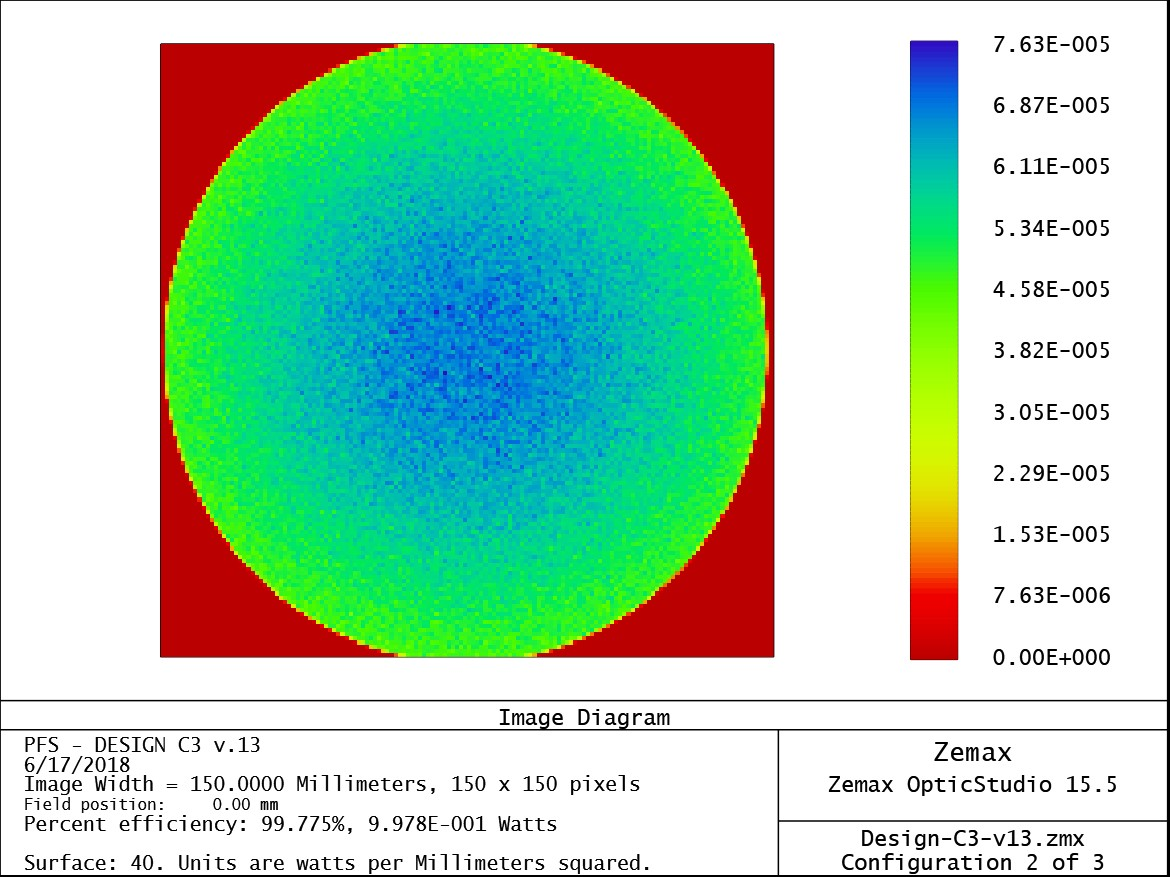

In [23]:
# ==============================================================================================
# example below, modeled in Zemax (ray-tracing software)
# even though the entrence pupil is uniformly illuminated, exit pupil is non-uniformly illuminated
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/ExitPupilImage.jpg")

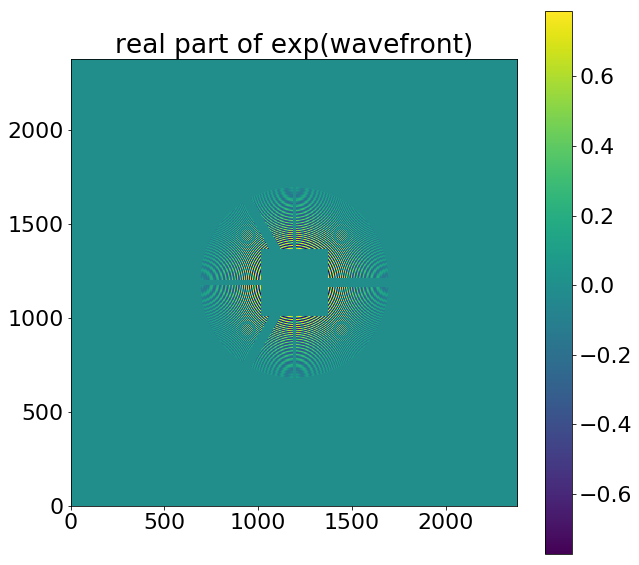

In [24]:
# ==============================================================================================
# wavefront across the pupil
# ==============================================================================================


expwf_grid=np.load('/Users/nevencaplar/Documents/PFS/Testing/MondayMeeting/expwf_grid.npy')  
plt.figure(figsize=(10,10))
plt.title('real part of exp(wavefront)')
plt.imshow(np.real(expwf_grid),origin='lower')
plt.colorbar()

## Optical PSF - 40x oversampled

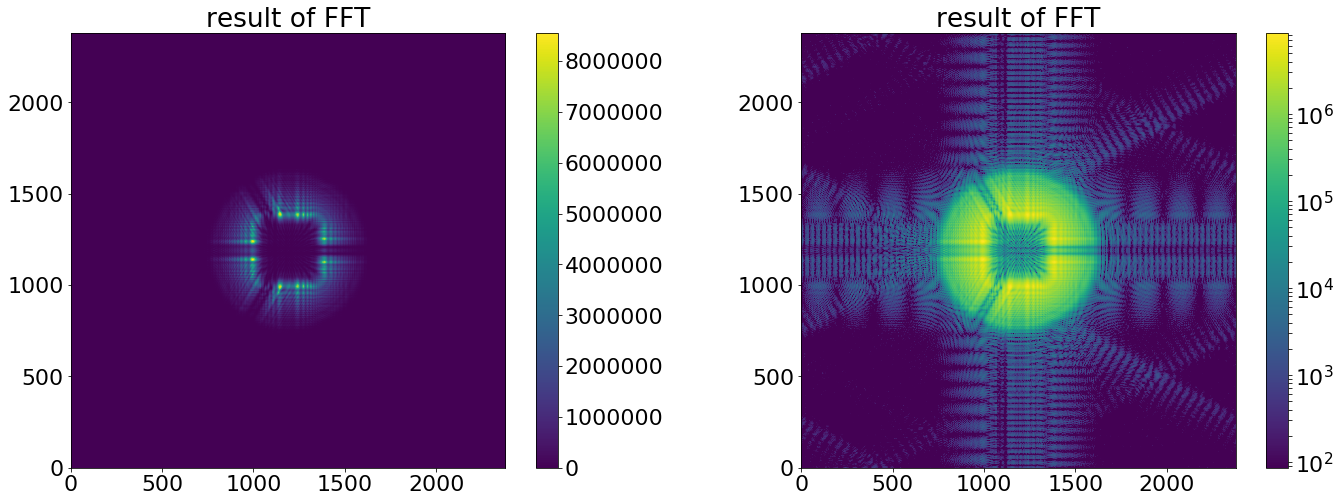

In [25]:
# ==============================================================================================
#  result of the integral
# ==============================================================================================

optPsf=np.load('/Users/nevencaplar/Documents/PFS/Testing/MondayMeeting/optPsf.npy') 
plt.figure(figsize=(24,8))
plt.subplot(121)
plt.imshow(optPsf,origin='lower')
middleposition=int(optPsf.shape[0]/2)
plt.colorbar()
plt.title('result of FFT')

plt.subplot(122)
plt.imshow(optPsf,origin='lower',norm=LogNorm(),vmax=np.max(optPsf),vmin=np.max(optPsf)/10**5)
plt.colorbar()
plt.title('result of FFT')

## spot convolved with fiber and pixel reponse - 10x oversampled

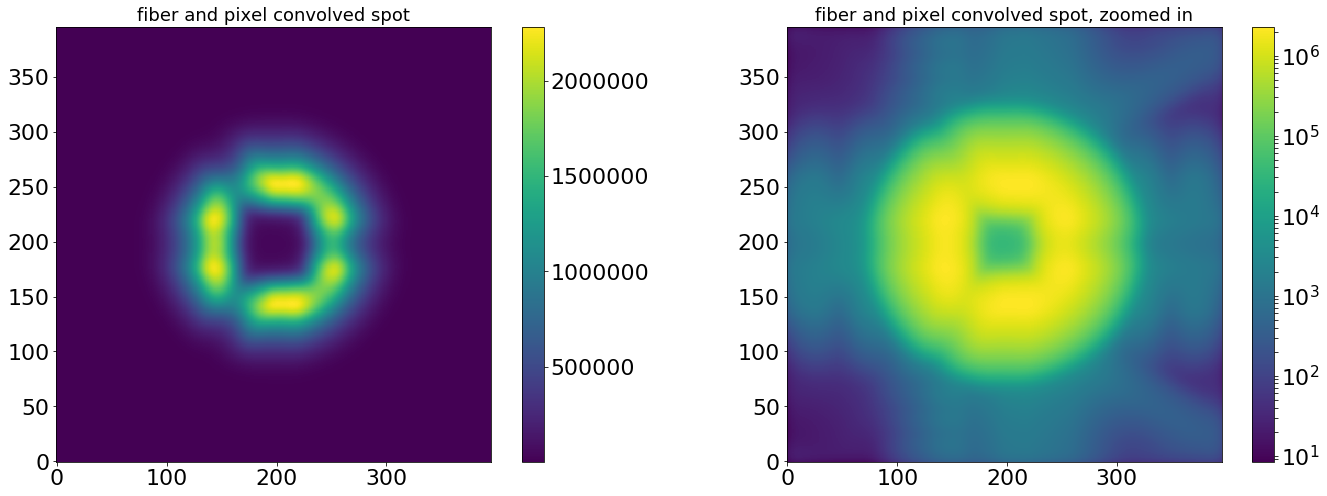

In [26]:
# ==============================================================================================
#  result from above after
#    i) convolution with fiber(tophat)
#    i) ccd effect (gaussian)
#    i) reducing oversampling from 40x to 10x
# ==============================================================================================



optPsf_cut_pixel_response_convolve=np.load('/Users/nevencaplar/Documents/PFS/Testing/MondayMeeting/optPsf_cut_pixel_response_convolved.npy')   
plt.figure(figsize=(24,8))
plt.subplot(121)
plt.imshow(optPsf_cut_pixel_response_convolve,origin='lower')
plt.colorbar()
plt.title('fiber and pixel convolved spot', fontsize=18)

plt.subplot(122)
plt.imshow(optPsf_cut_pixel_response_convolve,origin='lower',norm=LogNorm())
plt.colorbar()
plt.title('fiber and pixel convolved spot, zoomed in', fontsize=18)

In [27]:
# ==============================================================================================
# If optical abberations are "small" (patent pending), they serve to only widen a bit pure top hat profile of the fiber
# Top: Example from the ray-tracing software; blue and yellow are horizontal and vertical cut throught the center of the image
# Bottom: Same, for the ideal case of our model without any optical abberations
# ==============================================================================================

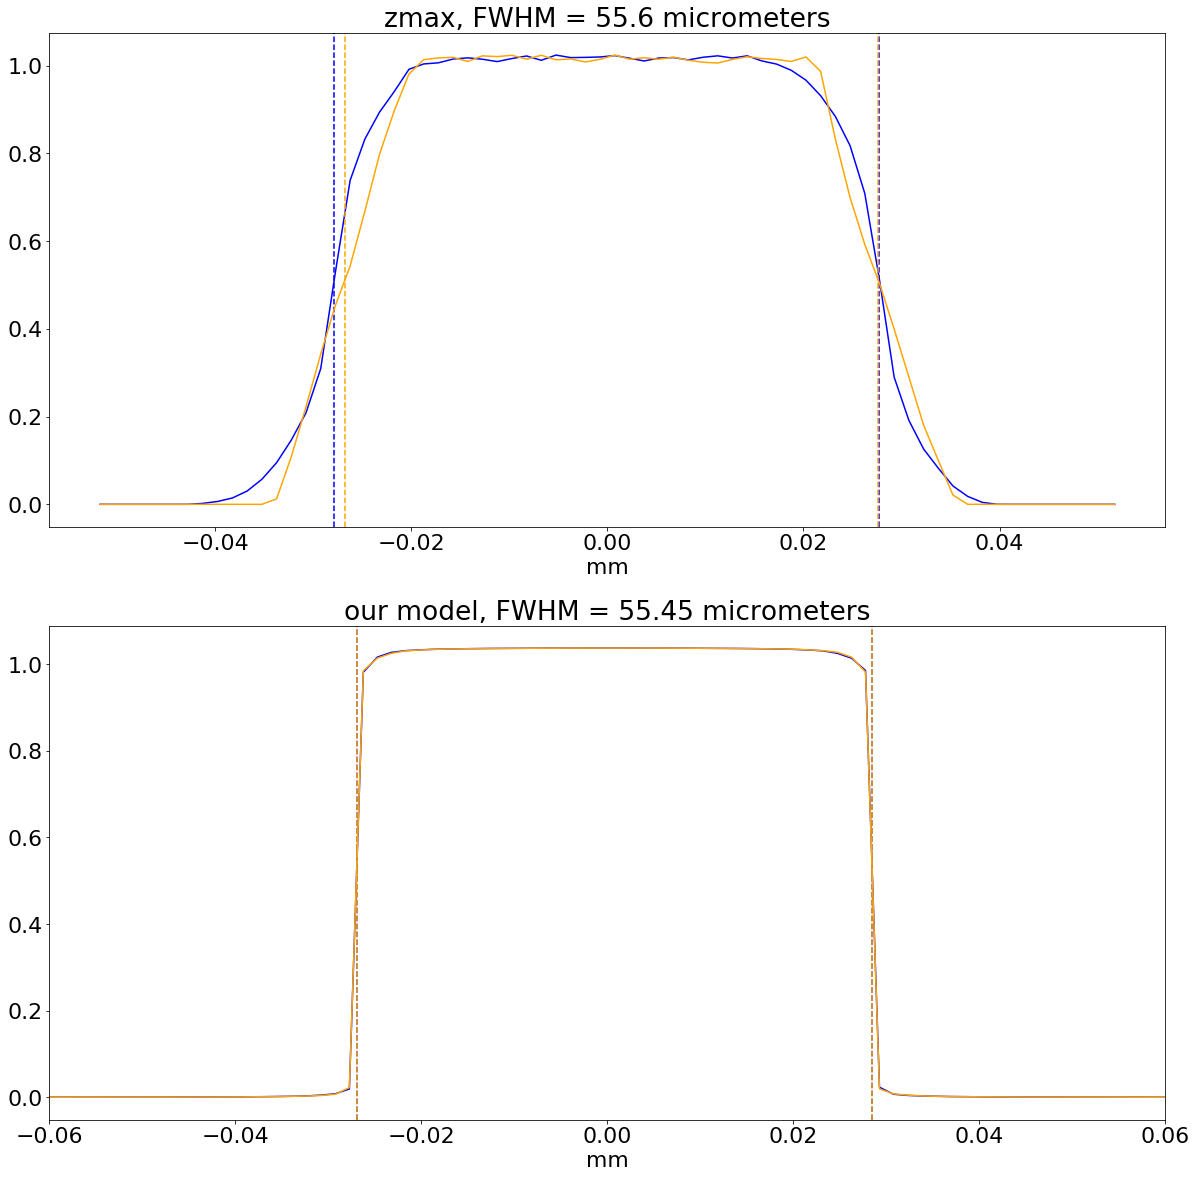

In [28]:
Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/fiber_size.png")

## final result - downsampled

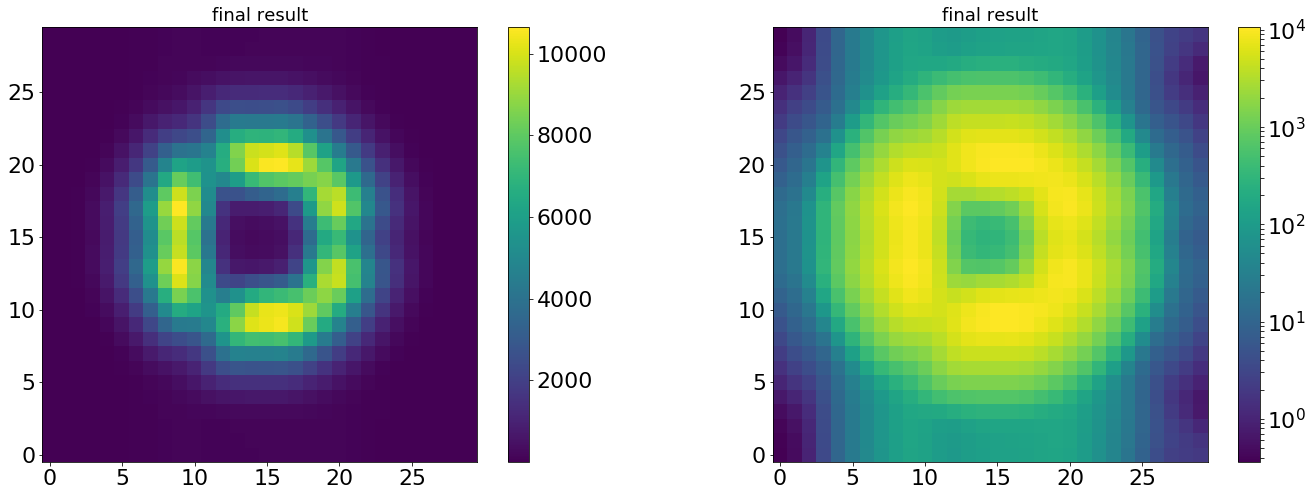

In [29]:
# ==============================================================================================
# final result, which can be compared with the data
# ==============================================================================================


optPsf_cut_fiber_convolved_downsampled=np.load('/Users/nevencaplar/Documents/PFS/Testing/MondayMeeting/optPsf_cut_fiber_convolved_downsampled.npy')   


plt.figure(figsize=(24,8))
plt.subplot(121)
plt.imshow(optPsf_cut_fiber_convolved_downsampled,origin='lower')
plt.colorbar()
plt.title('final result', fontsize=18)

plt.subplot(122)
plt.imshow(optPsf_cut_fiber_convolved_downsampled,origin='lower',norm=LogNorm())
plt.colorbar()
plt.title('final result', fontsize=18)

# Last week problem

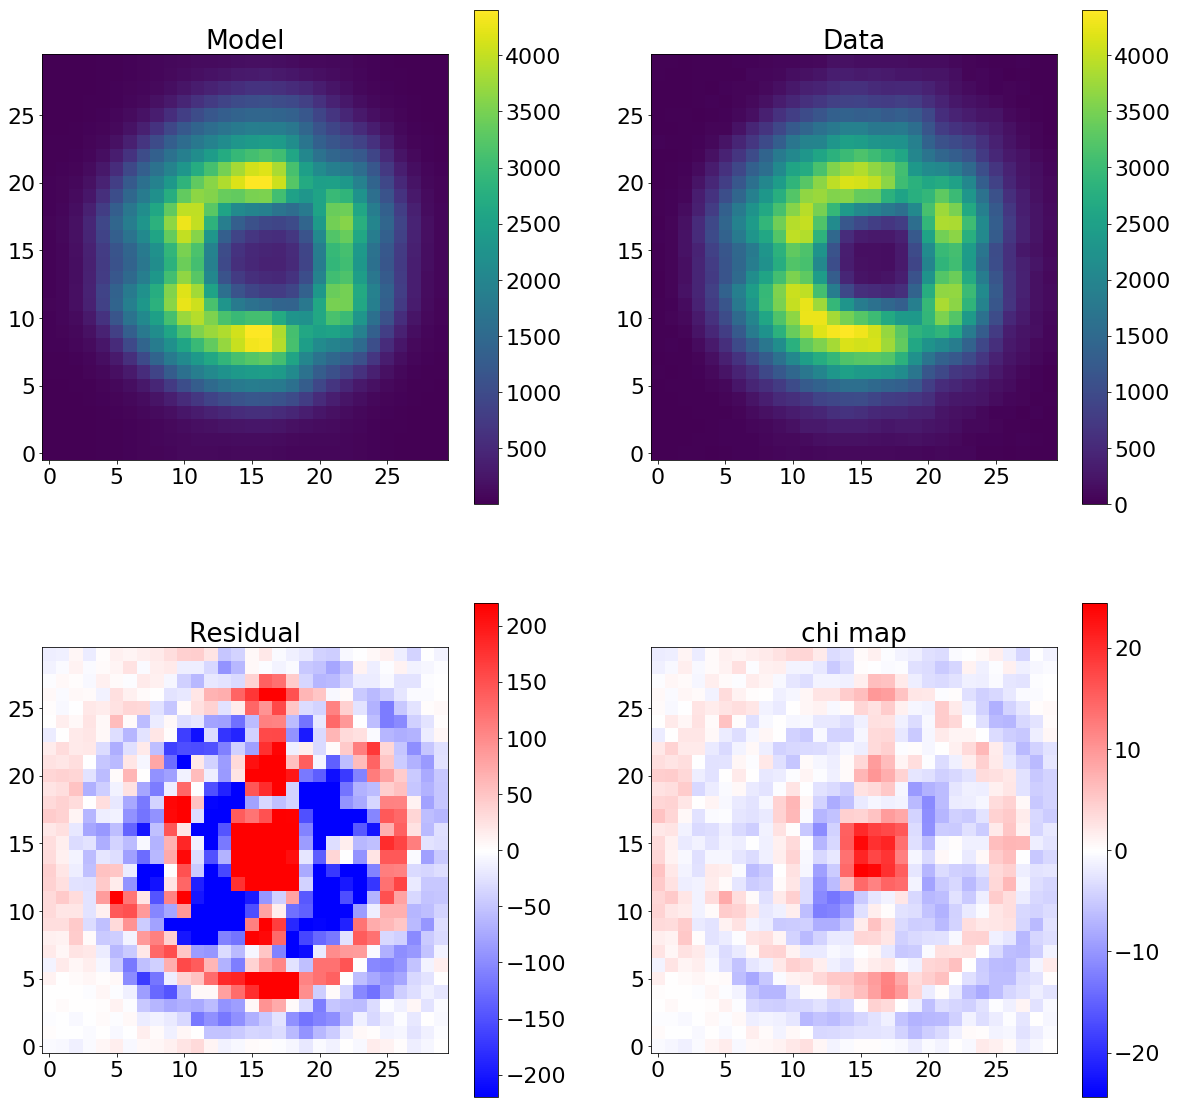

In [30]:
# ==============================================================================================
# Problem which I could not solve for a very long time
# Exces of the signal in the center of the donut in the modeled data
# Variance is very low in the areas where there is no signal (Variance = constant factor + signal) so these areas contribute greatly to the fit
# 
# Solution - wrong oversamplin factor
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/LastWeek.png")

# Curent status

## defocused data - not bad

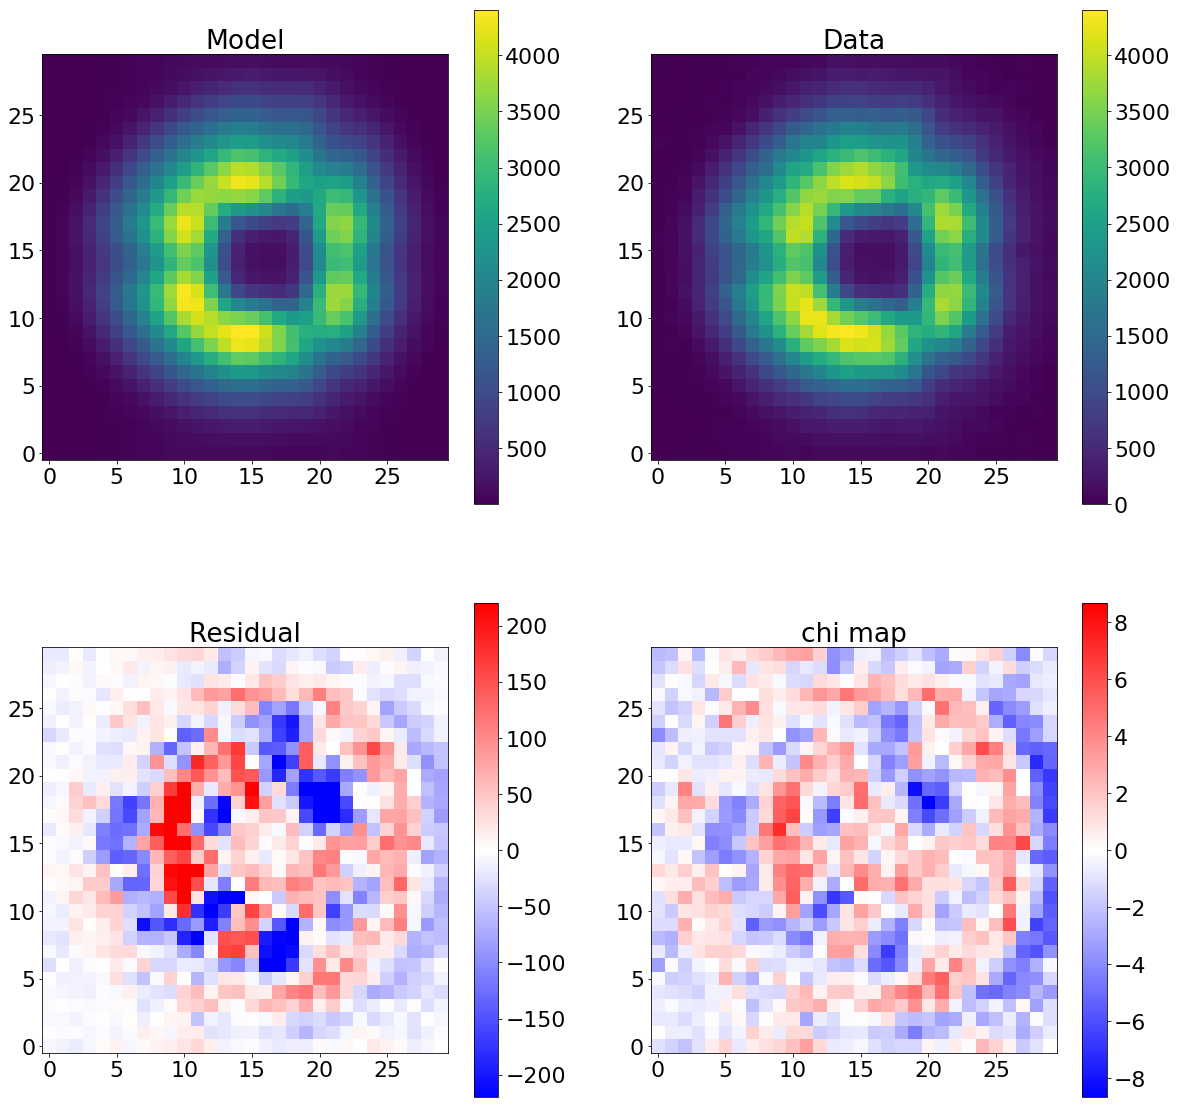

In [31]:
# ==============================================================================================
# Much better
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/ThisWeek.png")

## focused data - not bad?

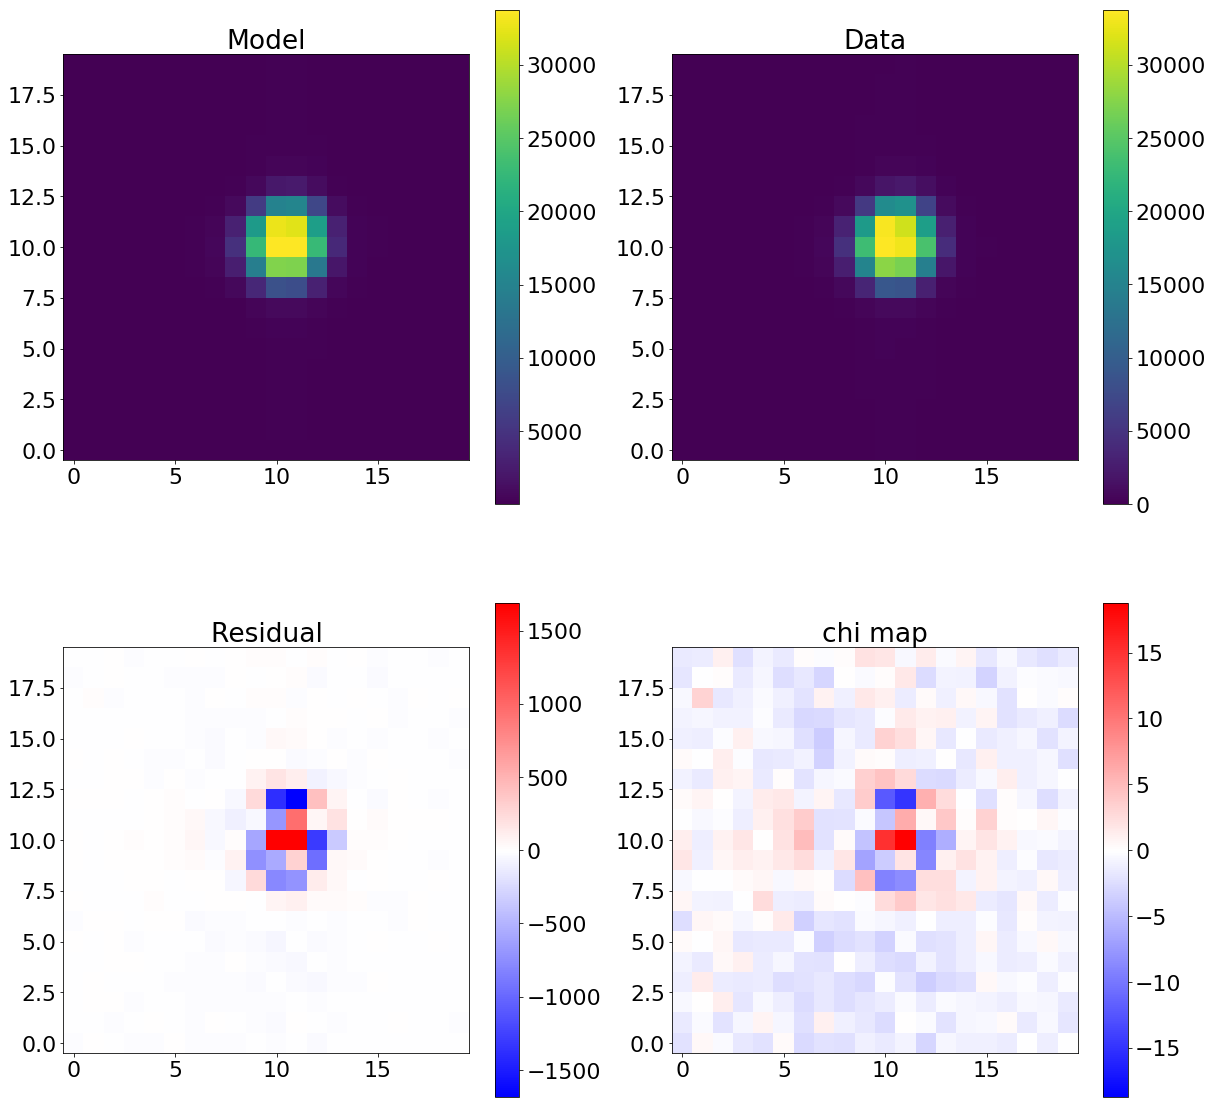

In [32]:
# ==============================================================================================
# no comment
# ==============================================================================================

Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/ResInFocus.png")

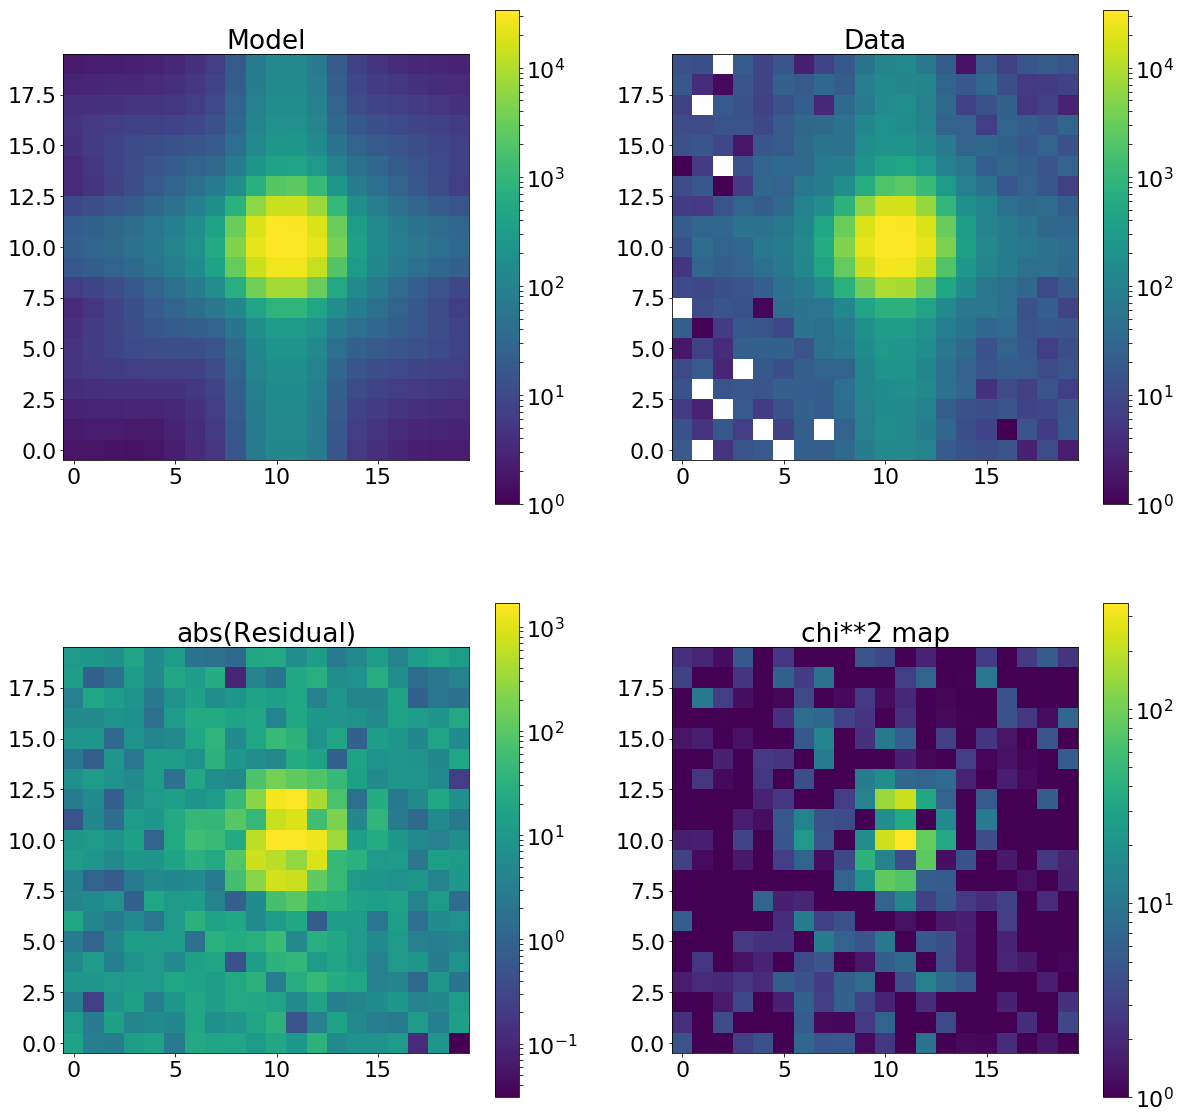

In [33]:
# ==============================================================================================
# Log scale - notice the extended structure
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/ResInFocusLog.png")

## prediction - ?????

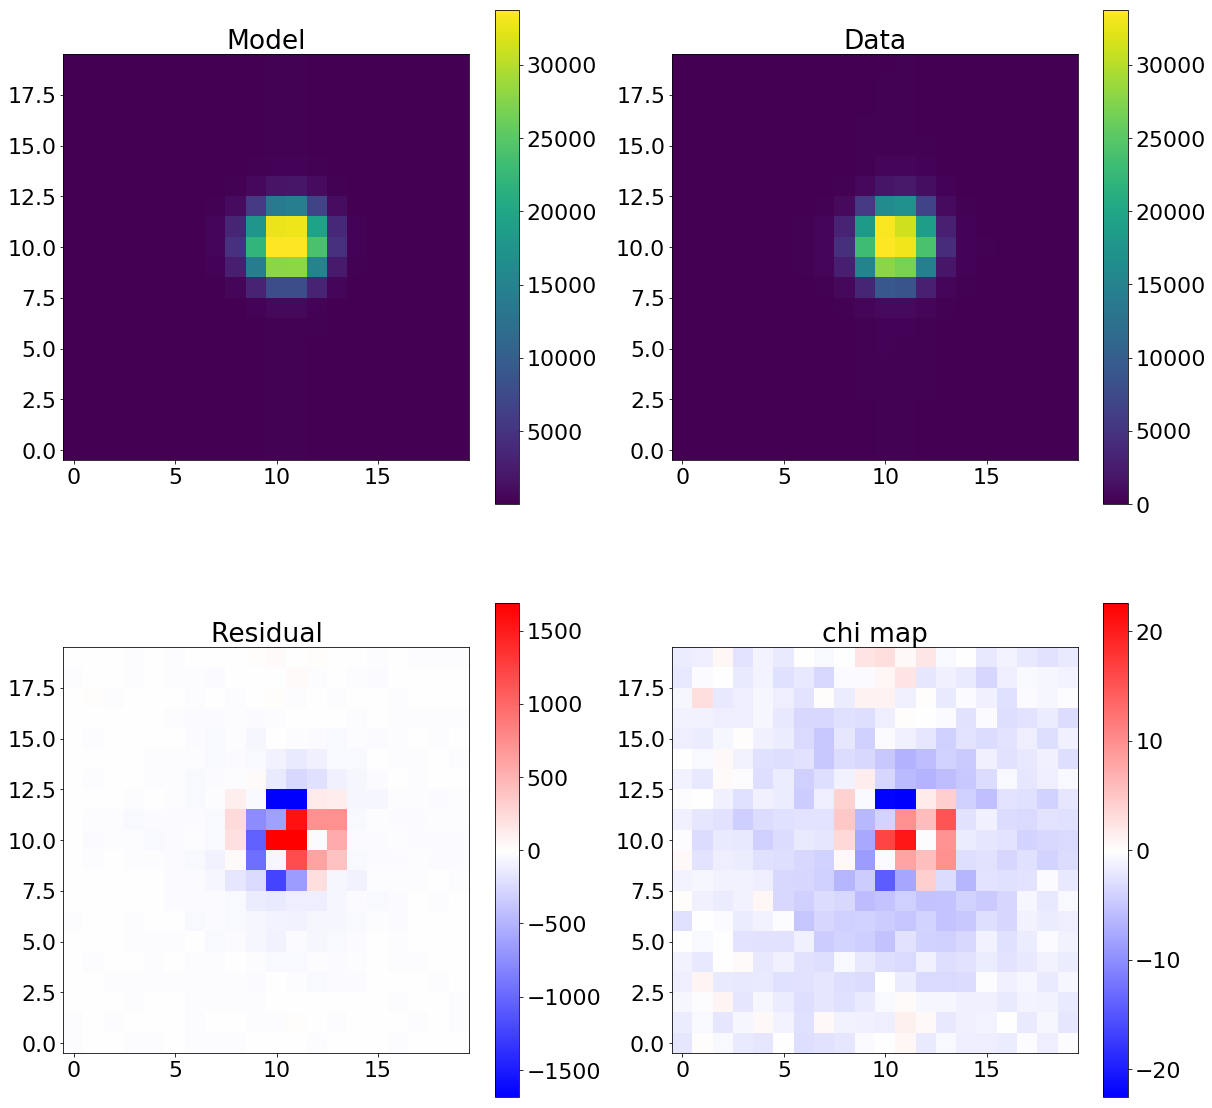

In [34]:
# ==============================================================================================
# We ultimately want to predict the PSF of the in focus from defocused data or different part of the focal plane
# This is the "prediction" of the data in the focus from all of the data avaliable for this one spot
# Fit is worse in two ways
#      i) higher chi**2
#      ii) does not account for extended wings of the PSF
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/ResInFocusPrediction.png")

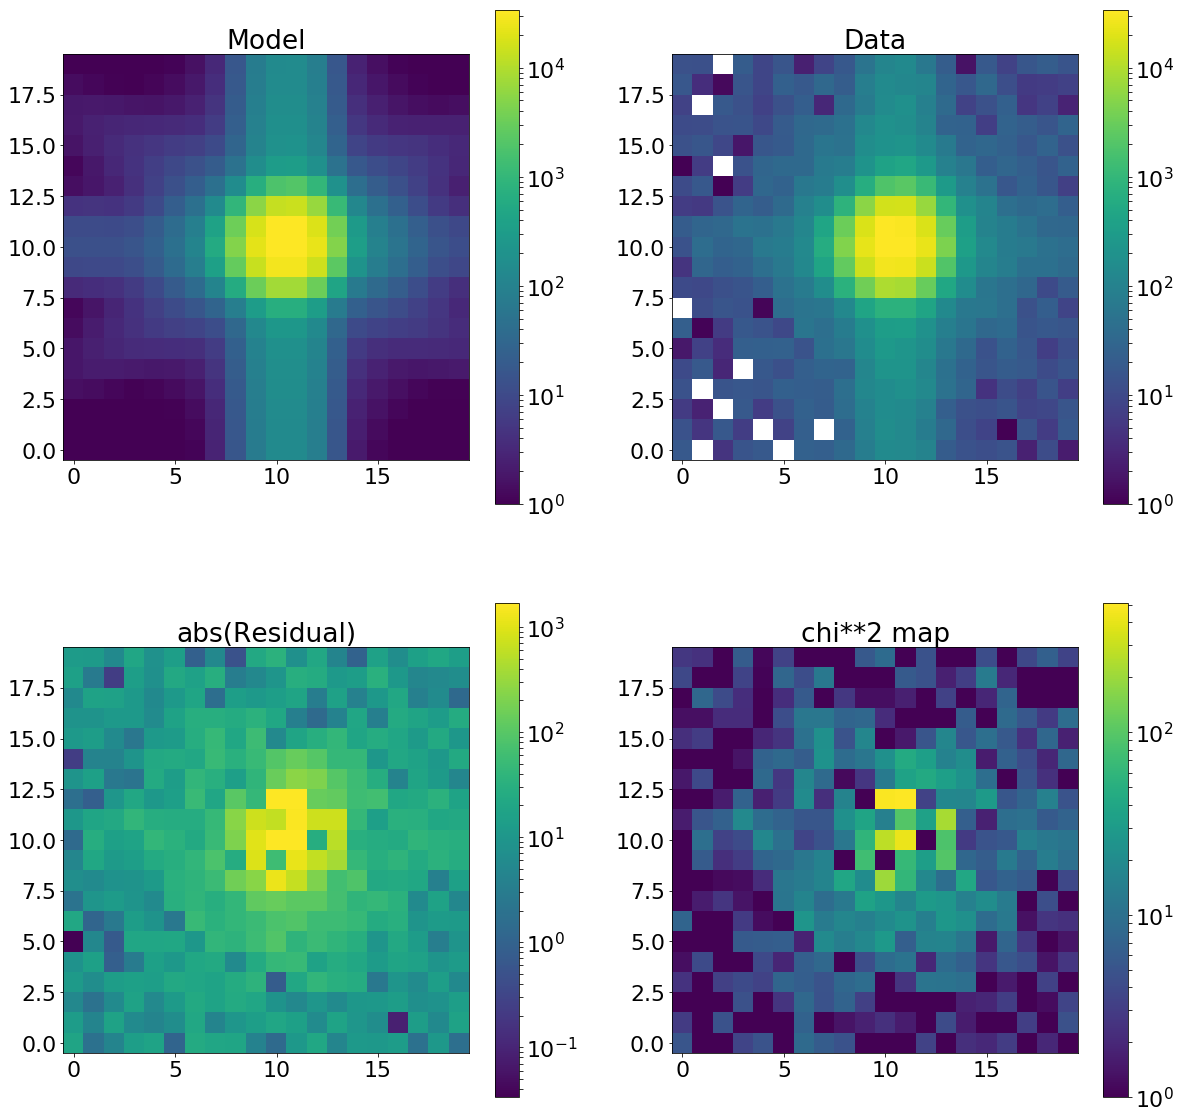

In [35]:
# ==============================================================================================
# Same as above just log scale
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/ResInFocusLogPrediction.png")

## reasons for this discrepancy?

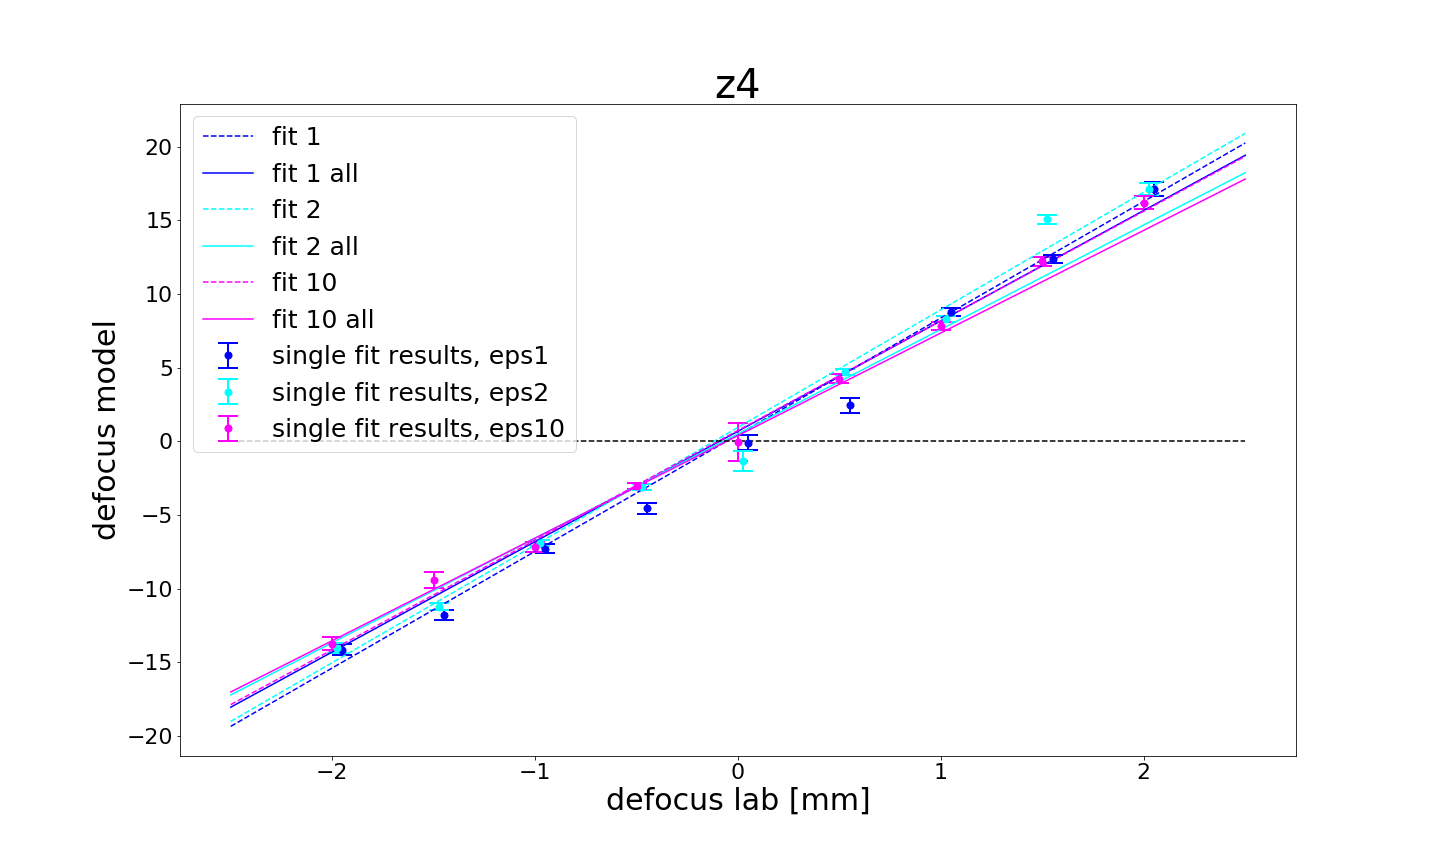

In [36]:
# ==============================================================================================
# Scaling of the defocus parameter (z4) as a function of movement of the slit in the lab
# Many lines - not crucial to understand what each one exactly represents but :
# full lines - find fit to all of the data in a single fit
# dashed lines - fit all of the spots separatly (results of these fits are given by point)
# blue, cyan and magenta - fits in which we had modified variance map 
# blue - original variance map
# cyan - modified so that variance map is "flatter", var_image=var_image*1/2
# magenta - modified so that variance map is "flatter", var_image=var_image*1/10
# you can see that result of our fit in the focus are different from any of the interpolations

# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/z4.png")

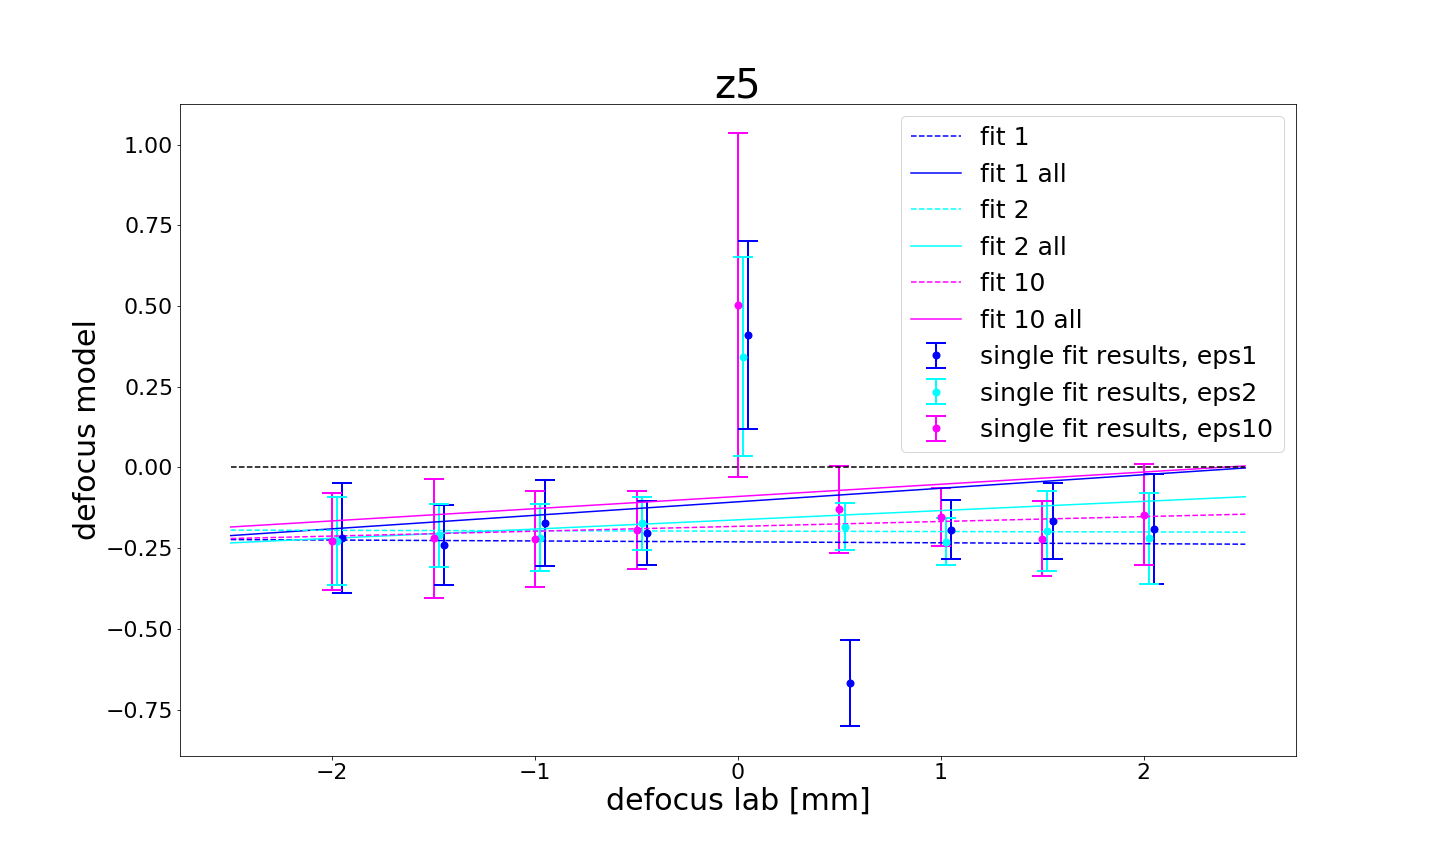

In [37]:
# ==============================================================================================
# Scaling of the Zernike parameter 5 (z5) as a function of movement of the slit in the lab
# effect even more pronounced in other examples
# ==============================================================================================


Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/z5.png")

## If we have time - why is there no extended structure of the PSF in the focus

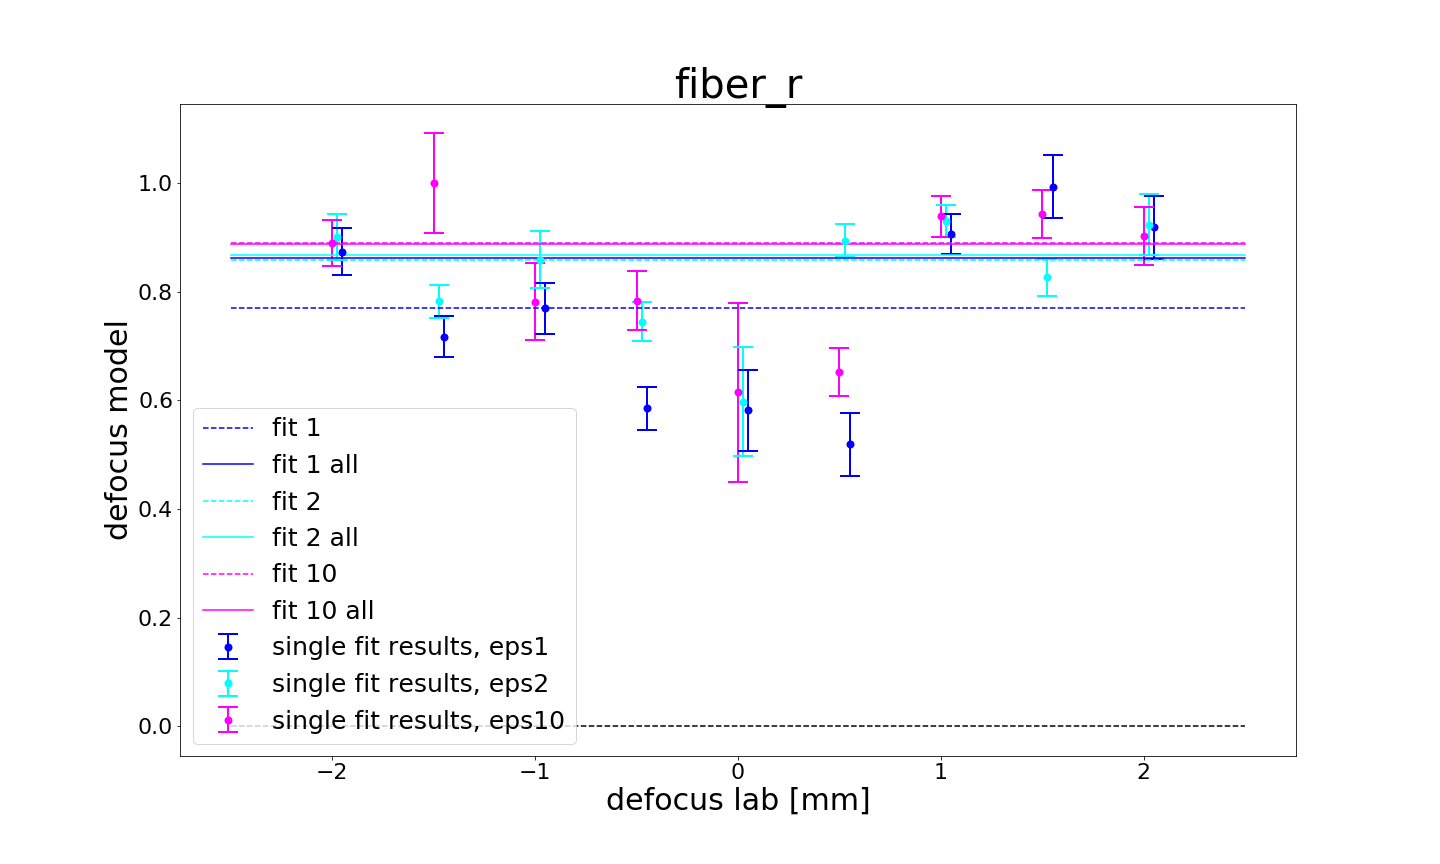

In [38]:
# ==============================================================================================
# This quantity is the main culprit why the interpolation in the center does not have nice extended structure
# This shows how well the exit pupil is illuminated (if you are asking whyself why does this matter, see below)

# The smaller this quantity is the larger is the generated PSF
# "Predicted" value and the value derived from fit to the single fit differ dramatically
#  Pointing to some scaling issue?
# ==============================================================================================
Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/fiber_r.png")

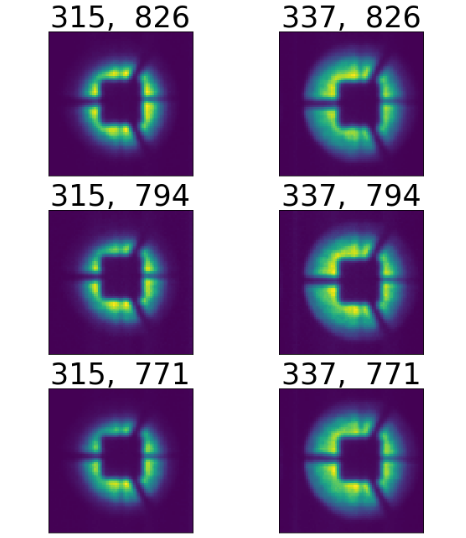

In [39]:
# ==============================================================================================
# We know that different fiber fill out exit pupil different amount
# see below highly defocused images from two adjecent fibers
# (number on the left: number of the fiber / number of the right: wavelength of the light in nm)
# ==============================================================================================

Image("/Users/nevencaplar/Documents/PFS/Images/MondayMeeting/IlluminationOfThePupil.png")